# Data preparation
First step in the machine learning cycle.

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
# Add iPython magic to print charts
%matplotlib inline

## Load dataset
Pandas allows a csv file to be loaded directly to a DataFrame structure with the function `pd.read_csv()`.

In [3]:
movies = pd.read_csv(filepath_or_buffer='datasets/movies.csv')
movies.head()

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [4]:
# Get dataframe dimensions
movies.shape

(5043, 19)

In [5]:
# Get dataframe columns
movies.columns

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

In [6]:
# Get dataframe index (rows)
movies.index

RangeIndex(start=0, stop=5043, step=1)

### Get columns and rows

In [7]:
# Get column
movies['movie_title']

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [8]:
# Get row
movies.loc[10]

movie_title                                Batman v Superman: Dawn of Justice 
title_year                                                                2016
color                                                                    Color
aspect_ratio                                                              2.35
duration                                                                   183
language                                                               English
country                                                                    USA
duration.1                                                                 183
genres                                                 Action|Adventure|Sci-Fi
content_rating                                                           PG-13
plot_keywords                based on comic book|batman|sequel to a reboot|...
director_name                                                      Zack Snyder
actor_1_name                                        

### Get info about data

In [9]:
# Get general info about dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   title_year                 4935 non-null   float64
 2   color                      5024 non-null   object 
 3   aspect_ratio               4714 non-null   float64
 4   duration                   5028 non-null   float64
 5   language                   5031 non-null   object 
 6   country                    5038 non-null   object 
 7   duration.1                 5028 non-null   float64
 8   genres                     5043 non-null   object 
 9   content_rating             4740 non-null   object 
 10  plot_keywords              4890 non-null   object 
 11  director_name              4939 non-null   object 
 12  actor_1_name               5036 non-null   object 
 13  actor_2_name               5030 non-null   objec

In [10]:
# Get DTypes of dataframe columns
movie_dtypes = movies.dtypes
movie_dtypes

movie_title                   object
title_year                   float64
color                         object
aspect_ratio                 float64
duration                     float64
language                      object
country                       object
duration.1                   float64
genres                        object
content_rating                object
plot_keywords                 object
director_name                 object
actor_1_name                  object
actor_2_name                  object
actor_3_name                  object
cast_total_facebook_likes      int64
budget                       float64
imdb_score                   float64
gross                        float64
dtype: object

In [11]:
# Compare data by dtypes (float or int)
numerical_columns = (movie_dtypes == float) | (movie_dtypes == int)
numerical_columns

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [12]:
# Get numerical column list
numerical_columns_list = [column for column in numerical_columns.index if numerical_columns[column]]
numerical_columns_list

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [13]:
# Compare data by dtypes (object)
object_columns = (movie_dtypes == object)
object_columns

movie_title                   True
title_year                   False
color                         True
aspect_ratio                 False
duration                     False
language                      True
country                       True
duration.1                   False
genres                        True
content_rating                True
plot_keywords                 True
director_name                 True
actor_1_name                  True
actor_2_name                  True
actor_3_name                  True
cast_total_facebook_likes    False
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [14]:
# Get object colum list
object_column_list = [column for column in object_columns.index if object_columns[column]]
object_column_list

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

### Quantitative data inspection

In [15]:
# Get statistics of numerical columns
movies_numerical_data = movies[numerical_columns_list]
movies_numerical_data.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


### Evaluate the integrity and healthy of data

View histograms of different columns to look for anomalies.

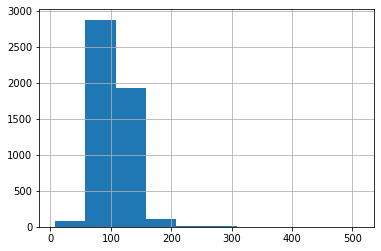

In [16]:
movies_numerical_data['duration'].hist()

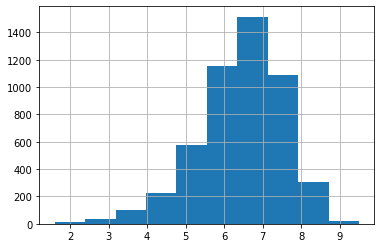

In [17]:
movies_numerical_data['imdb_score'].hist()

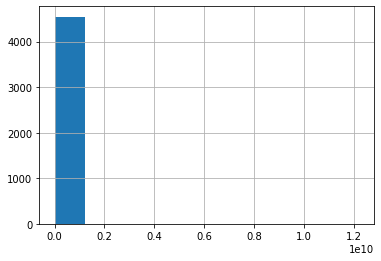

In [18]:
# In this case an anomaly is identified. A small number of films have a large budget
movies_numerical_data['budget'].hist()

In [19]:
# Get anomaly rows
bool_filter = (movies_numerical_data['budget'] > 1e9)
movies[bool_filter]

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


These rows are anomalies because the budget is not in USD.

### Clean data
Using another dataset we can get a more precise and standart gross feature.

In [20]:
financials = pd.read_csv(filepath_or_buffer='datasets/thenumbers.csv')
financials.head()

,Unnamed: 0,movie_name,domestic_gross,movie_link,production_budget,release_date,worldwide_gross,movie_title
0,0,Avatar,760507625,http://www.the-numbers.com/movie/Avatar#tab=su...,425000000,12/18/2009,2783918982,Avatar
1,1,Star Wars Ep. VII: The Force Awakens,936662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,306000000,12/18/2015,2058662225,Star Wars: Episode VII - The Force Awakens ...
2,2,Pirates of the Caribbean: At World's End,309420425,http://www.the-numbers.com/movie/Pirates-of-th...,300000000,5/24/2007,963420425,Pirates of the Caribbean: At World's End
3,3,Spectre,200074175,http://www.the-numbers.com/movie/Spectre#tab=s...,300000000,11/6/2015,879620923,Spectre
4,4,The Dark Knight Rises,448139099,http://www.the-numbers.com/movie/Dark-Knight-R...,275000000,7/20/2012,1084439099,The Dark Knight Rises


In [21]:
# Get only the important features
financials = financials[['movie_title', 'production_budget', 'worldwide_gross']]
financials.head()

,movie_title,production_budget,worldwide_gross
0,Avatar,425000000,2783918982
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225
2,Pirates of the Caribbean: At World's End,300000000,963420425
3,Spectre,300000000,879620923
4,The Dark Knight Rises,275000000,1084439099


In [22]:
# Get the number of rows in each dataset
print("Movies:     ", movies.shape[0])
print("Financials: ", financials.shape[0])

Movies:      5043
Financials:  4341


As can be seen, some movie examples will be lost because the datasets do not have the same number of lines. **But it is more important to have clean data than a lot of data**.

In [23]:
# Concatenate the movie title with its numeric data to perform a join
movies_numerical_data = pd.concat(objs=[movies['movie_title'], movies_numerical_data], axis=1)
movies_numerical_data.head()

,movie_title,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN


Before join the datasets is necessary clean the common feature, and delete duplicates if exists.


In [24]:
# Clean spaces
movies_numerical_data['movie_title'] = movies_numerical_data['movie_title'].str.strip()
financials['movie_title'] = financials['movie_title'].str.strip()

In [25]:
# Check if movies dataframe has duplicate rows
movies_numerical_data['movie_title'].value_counts()

Halloween                              3
Victor Frankenstein                    3
Pan                                    3
The Fast and the Furious               3
King Kong                              3
                                      ..
The Sting                              1
The Curious Case of Benjamin Button    1
Pitch Perfect                          1
Come Early Morning                     1
Little Miss Sunshine                   1
Name: movie_title, Length: 4916, dtype: int64

In [26]:
# Check if financials dataframe has duplicate rows
financials['movie_title'].value_counts()

American History X        1
Road Trip                 1
My Dog Tulip              1
Below Zero                1
L.A. Confidential         1
                         ..
Paranormal Activity       1
Juno                      1
Mary Poppins              1
Penguins of Madagascar    1
Little Miss Sunshine      1
Name: movie_title, Length: 4341, dtype: int64

The movies dataframe has repeating columns. We will remove them below.

In [27]:
# Delete duplicate rows
movies_numerical_data = movies_numerical_data.drop_duplicates(subset='movie_title', keep='first')

In [28]:
# Get the number of rows in each dataset
print("Movies:     ", movies_numerical_data.shape[0])
print("Financials: ", financials.shape[0])

Movies:      4916
Financials:  4341


As can be seen, duplicate rows are eliminated in the movies dataframe.

In [29]:
# Join movies numerical data with financials data
movies = pd.merge(left=financials, right=movies_numerical_data, how='left', on='movie_title')
movies.head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
3,Spectre,300000000,879620923,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
4,The Dark Knight Rises,275000000,1084439099,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0


In [30]:
movies.shape

(4341, 11)

### Remove not meaningful rows

In [31]:
# Check non-null values
movies.notnull().head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,False,False,False,False,True,False,True,False
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True


In [32]:
# Count the null values for each feature
movies.notnull().apply(func=pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,NaN,28,273,13,13,NaN,334,NaN,664
True,4341.0,4341.0,4341.0,4313,4068,4328,4328,4341.0,4007,4341.0,3677


In [33]:
# Count the zero values for each feature
(movies != 0).apply(func=pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,280,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4341.0,4341.0,4061,4341.0,4341.0,4341.0,4341.0,4314,4341.0,4341.0,4341.0


In [34]:
available_data = ((movies != 0) & (movies.notnull()))
available_data.head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,False,False,False,False,True,False,True,False
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True


In [35]:
# Check at the row level (by axis equal to 1) if there is at least one False value
available_data.all(axis=1).value_counts()

True     3373
False     968
dtype: int64

If we remove all null or zero fields we will lose many rows, which is not ideal. For this reason we will eliminate the zero fields only from the target variable: __worldwide_gross__.

In [36]:
((movies != 0) & (movies.notnull()))['worldwide_gross'].value_counts()

True     4061
False     280
Name: worldwide_gross, dtype: int64

In [37]:
# Get only rows with non-null worldwide_gross value
movies = movies[available_data['worldwide_gross']]
movies.head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
3,Spectre,300000000,879620923,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
4,The Dark Knight Rises,275000000,1084439099,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0


Now we use SKLearn to fill in the missing data, in this case only the null fields. The strategy that we will use will be to use the mean.

In [38]:
# First, we remove the columns that we are not interested. In this case, "movie_title",
# because is a non-numeric feature and "duration.1" because is a duplicate feature.
movies = movies.drop(columns=['movie_title', 'duration.1'], axis=1)
movies.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000,2783918982,2009.0,1.78,178.0,4834,237000000.0,7.9,760505847.0
1,306000000,2058662225,NaN,NaN,NaN,143,NaN,7.1,NaN
2,300000000,963420425,2007.0,2.35,169.0,48350,300000000.0,7.1,309404152.0
3,300000000,879620923,2015.0,2.35,148.0,11700,245000000.0,6.8,200074175.0
4,275000000,1084439099,2012.0,2.35,164.0,106759,250000000.0,8.5,448130642.0


In [39]:
# Use SimpleImputer to fill the null values
imputer = SimpleImputer()
complete_values = imputer.fit_transform(X=movies)
complete_values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09, 2.00210736e+03, ...,
        3.71305993e+07, 7.10000000e+00, 4.81900113e+07],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00, 4.81900113e+07],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        3.71305993e+07, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

In [40]:
# Create dataframe with complete data
x = pd.DataFrame(data=complete_values)
x.head()

,0,1,2,3,4,5,6,7,8
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.107364,2.126754,108.542088,143.0,3.713060e+07,7.1,4.819001e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08


In [41]:
# Set the movies dataframe indexes
x.columns = movies.columns
x.index = movies.index
x.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.107364,2.126754,108.542088,143.0,3.713060e+07,7.1,4.819001e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08


In [42]:
# Save the clean dataset in a .csv file
x.to_csv(path_or_buf="datasets/x.csv", index=False)